# Question 1:
Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [1]:
# install relevant modules
import numpy as np

# scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import load_iris function from datasets module
from sklearn.datasets import load_iris


# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

In [2]:
# save "bunch" object containing iris dataset and its attributes into iris_df
iris_df = load_iris()
type(iris_df)

sklearn.utils.Bunch

In [3]:
# Look into the features 
print (iris_df.feature_names)
print (iris_df.data[0:3, :])
print(type(iris_df.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
<class 'numpy.ndarray'>


In [4]:
# Look into the labels
print (iris_df.target_names)
print (iris_df.target[:3])
print(type(iris_df.target))

['setosa' 'versicolor' 'virginica']
[0 0 0]
<class 'numpy.ndarray'>


In [6]:
# store feature matrix in X and label vector in y
X = iris_df.data
y = iris_df.target
# print and check shapes of X and y
print("shape of X: ", X.shape, "& shape of y: ", y.shape)

shape of X:  (150, 4) & shape of y:  (150,)


# K-nearest neighbors (KNN) classification

In [7]:
# KNN classification 
# Instantiate the estimator 
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
# output displays the default values
knn1.fit(X, y)
knn5.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
# Predict the response
X_new = [[3, 4, 5, 2], [5, 2, 3, 2]]
print("n_neighbors=1 predicts: ", knn1.predict(X_new))
print("n_neighbors=5 predicts: ", knn5.predict(X_new))

n_neighbors=1 predicts:  [2 1]
n_neighbors=5 predicts:  [1 1]


# Logistic Regression Classification

In [9]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
# output displays the default values
logreg.fit(X, y)

C:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# predict the response for new observations
logreg.predict(X_new)

array([2, 1])

# Evaluating the models

In [12]:
# Splitting the data in 75% training data and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print("shape of X_train: ", X_train.shape, "& shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape, "& shape of y_test: ", y_test.shape)

shape of X_train:  (90, 4) & shape of y_train:  (90,)
shape of X_test:  (60, 4) & shape of y_test:  (60,)


In [13]:
# Instantiate the estimators 
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

# Train the models
# output displays the default values
logreg.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_test, y_test)
print('\n')

# Predictions
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# compute classification accuracy for the logistic regression model
print("Accuracy of KNN with n_neighbors=1: ", metrics.accuracy_score(y_test, y_pred_knn1))
print("Accuracy of KNN with n_neighbors=5: ", metrics.accuracy_score(y_test, y_pred_knn5))
print("Accuracy of logistic regression: ", metrics.accuracy_score(y_test, y_pred_logreg))



Accuracy of KNN with n_neighbors=1:  0.95
Accuracy of KNN with n_neighbors=5:  0.9833333333333333
Accuracy of logistic regression:  0.9666666666666667


# Best estimate of K for KNN-classification

In [14]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26, 2))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

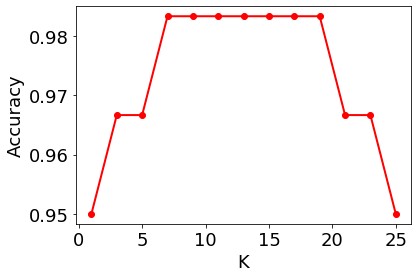

In [15]:
# plot the relationship between K and testing accuracy
plt.rcParams.update({'font.size': 18})
plt.plot(k_range, scores, 'ro', linewidth=2.0, linestyle="-")
plt.xlabel('K')
plt.ylabel('Accuracy')